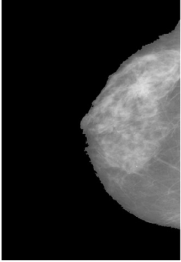

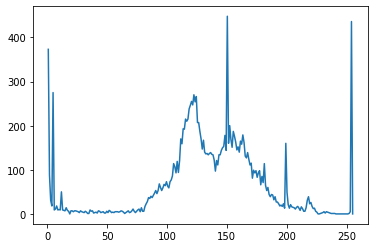

FINAL:
[16.210559130061313, 255, 147.32958510596353, 112.881548549948, 71.87985440548759]
-6137390.407185791
FINAL:
[36.42301039474636, 100.42740618457034, 134.28455290567717, 255, 163.2727279424962]
-6137146.9393757135
FINAL:
[20.615994013729516, 115.99659778500974, 76.03753635621761, 255.0, 147.96880074395028]
-6137360.865504168
FINAL:
[162.55609478796237, 82.26141102616359, 130.97263202791197, 255, 20.415880600657296]
-6137310.894694649
FINAL:
[71.30790563880258, 255.0, 145.53419569299265, 111.75975276867591, 16.37901540862151]
-6137354.858248023
FINAL:
[71.27681973412857, 16.836032898427657, 147.58842394060628, 255, 113.59168865049848]
-6137394.759526106
FINAL:
[18.807511307378768, 255.0, 77.54928401184912, 151.1450911263551, 120.96539385905376]
-6137207.193846341
FINAL:
[255, 16.110356935300135, 148.28528917043997, 71.84852508431436, 114.18055134917883]
-6137387.821759656
FINAL:
[79.86643618479953, 255, 20.818850863313372, 124.409643562585, 156.34637261289635]
-6137247.164707836
F

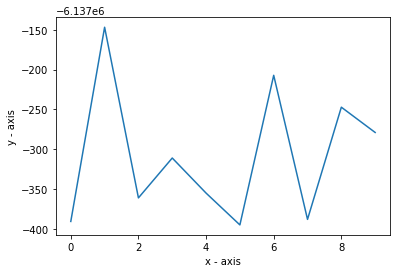

[255, 147.32958510596353, 112.881548549948, 71.87985440548759, 16.210559130061313]


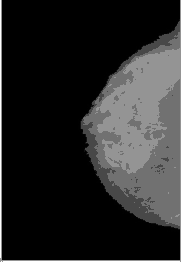

PSNR value for this image is 33.413381574789256
SSIM: 0.8887148748104284


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:233: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='1.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5
# print(h)

def dist(a,b):
    t = 0
    p = 0
    for i in range(0,nt):
        k1=a[i]*a[i]
        k2=b[i]*b[i]
        k=k1-k2
        k=abs(k)
        k=sqrt(k)
        t+=k
#     print(t)
    return t
        

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2


def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]
    
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        probab= 0
        radius= 100
        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            for j in range(0,num_particles):
                pos=list(swarm[j].position_i)
                err=float(swarm[j].err_i)
                for k in range(0,num_particles):
                    if dist(list(swarm[j].position_i),list(swarm[k].position_i))<=radius:
                        if swarm[k].err_i<err:
                            err=float(swarm[k].err_i)
                            pos=list(swarm[k].position_i)
                    else:
                        if random.random()<=probab and swarm[k].err_i<err:
                            err=float(swarm[k].err_i)
                            pos=list(swarm[k].position_i)
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
            probab=probab+1.0/maxiter
        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))



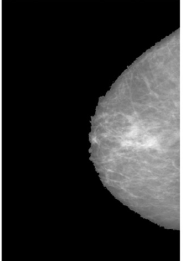

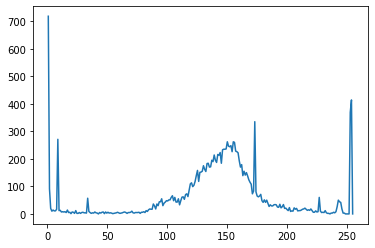

FINAL:
[151.72393128249814, 209.3882317478959, 119.60635140552496, 15.430362442681274, 74.05960872987093]
-6288351.812929181
FINAL:
[214.4282692071809, 118.21442847383793, 151.2814955067711, 8.072481081998411, 59.82957369359045]
-6288170.761646727
FINAL:
[17.47263610069822, 156.37845983745675, 123.21516488525967, 74.65880728574223, 242.86803479644232]
-6288256.105831889
FINAL:
[209.2447557460817, 152.91041659879002, 17.56515892437826, 79.25195519593925, 122.36279187048383]
-6288369.8477742635
FINAL:
[156.6314880975006, 125.7000959952856, 17.94171909647357, 79.24012630221699, 214.8568352244252]
-6288381.914734013
FINAL:
[71.23541831856541, 150.01628570534706, 12.681842978971327, 214.31019991476927, 117.7094383958242]
-6288300.458109364
FINAL:
[17.152718630474368, 157.1775397308537, 124.33411448601572, 82.14744612860429, 242.5949616671201]
-6288224.134601207
FINAL:
[213.68818374069488, 17.21621624967403, 70.2437732608108, 150.46530829344084, 118.39718913471711]
-6288403.1464433465
FINAL:

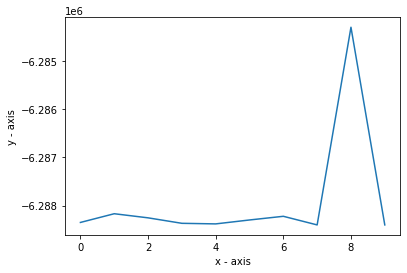

[212.66859532783027, 153.92258677910039, 122.48650286689977, 77.03523477663202, 17.77214083665082]


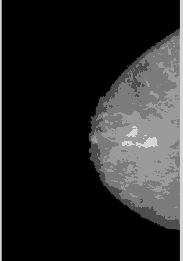

PSNR value for this image is 33.28151196655028
SSIM: 0.9012765685784039


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:233: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='2.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5
# print(h)

def dist(a,b):
    t = 0
    p = 0
    for i in range(0,nt):
        k1=a[i]*a[i]
        k2=b[i]*b[i]
        k=k1-k2
        k=abs(k)
        k=sqrt(k)
        t+=k
#     print(t)
    return t
        

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2


def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]
    
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        probab= 0
        radius= 100
        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            for j in range(0,num_particles):
                pos=list(swarm[j].position_i)
                err=float(swarm[j].err_i)
                for k in range(0,num_particles):
                    if dist(list(swarm[j].position_i),list(swarm[k].position_i))<=radius:
                        if swarm[k].err_i<err:
                            err=float(swarm[k].err_i)
                            pos=list(swarm[k].position_i)
                    else:
                        if random.random()<=probab and swarm[k].err_i<err:
                            err=float(swarm[k].err_i)
                            pos=list(swarm[k].position_i)
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
            probab=probab+1.0/maxiter
        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))



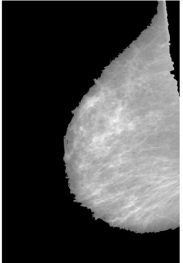

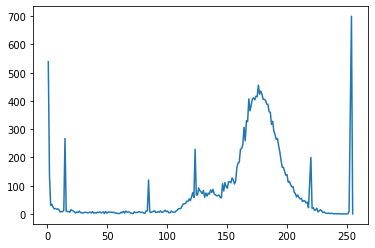

FINAL:
[74.92455271458915, 13.803217973882528, 178.15681881218927, 252.62810004661773, 143.4131033412605]
-10428089.74727105
FINAL:
[1.0, 201.55203505303646, 10.512744004070077, 150.8181750577746, 73.06402841364898]
-10421999.744159319
FINAL:
[9.92910356584087, 62.32964235595271, 113.52172614020937, 253.8239628720435, 160.15908229774195]
-10427081.23903929
FINAL:
[206.72900150229037, 6.8136258293086, 158.14313956876842, 48.66179063553437, 108.09931613987514]
-10426998.772166967
FINAL:
[12.26066801326279, 253.32425282653438, 74.87416686978287, 144.16242122291317, 179.8744155656952]
-10428195.831333902
FINAL:
[32.05867165373096, 160.67016891146037, 255.0, 108.71711375938723, 253.8387431749447]
-10422548.701871127
FINAL:
[180.0967423422501, 73.06777189651363, 143.19708566551327, 254.71107936597338, 10.604007922904021]
-10428193.877463587
FINAL:
[32.524366743289704, 182.8883220599752, 108.02074601739632, 151.52965955667455, 254.83763850666327]
-10427954.169206284
FINAL:
[75.50599720833023,

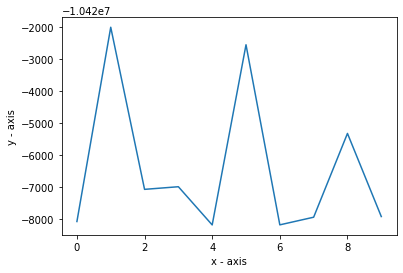

[252.62810004661773, 178.15681881218927, 143.4131033412605, 74.92455271458915, 13.803217973882528]


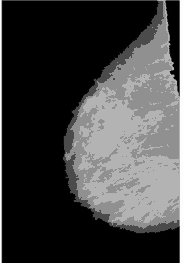

PSNR value for this image is 32.34377371697009
SSIM: 0.8440028798053189


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:233: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='3.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5
# print(h)

def dist(a,b):
    t = 0
    p = 0
    for i in range(0,nt):
        k1=a[i]*a[i]
        k2=b[i]*b[i]
        k=k1-k2
        k=abs(k)
        k=sqrt(k)
        t+=k
#     print(t)
    return t
        

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2


def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]
    
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        probab= 0
        radius= 100
        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            for j in range(0,num_particles):
                pos=list(swarm[j].position_i)
                err=float(swarm[j].err_i)
                for k in range(0,num_particles):
                    if dist(list(swarm[j].position_i),list(swarm[k].position_i))<=radius:
                        if swarm[k].err_i<err:
                            err=float(swarm[k].err_i)
                            pos=list(swarm[k].position_i)
                    else:
                        if random.random()<=probab and swarm[k].err_i<err:
                            err=float(swarm[k].err_i)
                            pos=list(swarm[k].position_i)
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
            probab=probab+1.0/maxiter
        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))



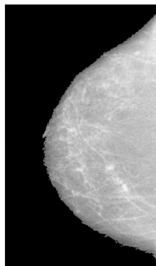

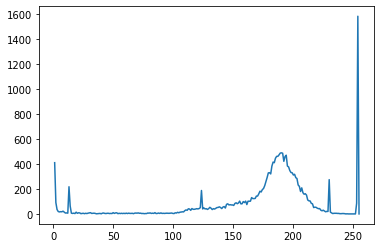

FINAL:
[7.583267572147382, 166.03354568842258, 104.51595988093895, 255, 41.32207073507909]
-11449800.097920964
FINAL:
[187.93533519607283, 101.17616667173657, 28.057928605849465, 153.55466881066982, 253.74522793372375]
-11452263.018501604
FINAL:
[156.07734387654557, 189.77343219974966, 254.6150667223367, 102.00008215008728, 29.916919142189833]
-11452325.434126953
FINAL:
[6.299611235628645, 164.46167122606784, 106.84210355586687, 41.223581874427325, 217.55825616306828]
-11450187.332325501
FINAL:
[255.0, 154.15069915646205, 29.233480903019558, 189.44090575768038, 103.41667095523474]
-11451779.729994236
FINAL:
[102.22636311397692, 154.84299294898614, 188.2899623441412, 255, 28.49765374858971]
-11451805.347058201
FINAL:
[102.21290378113655, 29.9042886959704, 166.11856169274301, 255.0, 1.0]
-11446662.169292266
FINAL:
[157.75981646171522, 102.83176431952602, 190.76462498337816, 255.0, 28.063057549540098]
-11451766.416399183
FINAL:
[154.91153715629736, 102.5461455849263, 28.93474559845324, 25

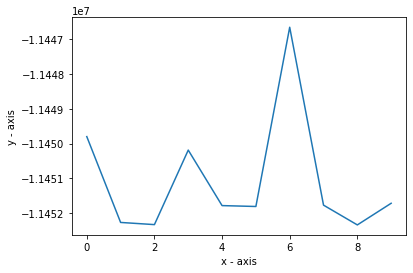

[255.0, 184.59256665037466, 151.91801555876603, 102.63976306613603, 27.36703103814063]


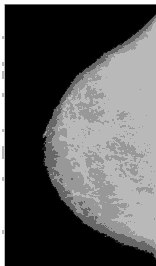

PSNR value for this image is 31.767348052317338
SSIM: 0.8349090895044708


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:233: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='4.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5
# print(h)

def dist(a,b):
    t = 0
    p = 0
    for i in range(0,nt):
        k1=a[i]*a[i]
        k2=b[i]*b[i]
        k=k1-k2
        k=abs(k)
        k=sqrt(k)
        t+=k
#     print(t)
    return t
        

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2


def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]
    
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        probab= 0
        radius= 100
        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            for j in range(0,num_particles):
                pos=list(swarm[j].position_i)
                err=float(swarm[j].err_i)
                for k in range(0,num_particles):
                    if dist(list(swarm[j].position_i),list(swarm[k].position_i))<=radius:
                        if swarm[k].err_i<err:
                            err=float(swarm[k].err_i)
                            pos=list(swarm[k].position_i)
                    else:
                        if random.random()<=probab and swarm[k].err_i<err:
                            err=float(swarm[k].err_i)
                            pos=list(swarm[k].position_i)
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
            probab=probab+1.0/maxiter
        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))



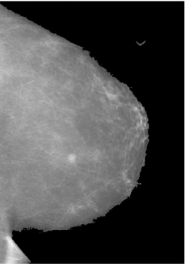

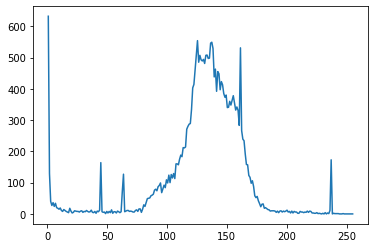

FINAL:
[9.799950897510998, 42.24798172529555, 119.37203076498051, 80.12095939482636, 146.4690551212272]
-9992131.642245471
FINAL:
[255.0, 237.97747578694748, 98.51639751439862, 28.461662504307064, 139.0093103815293]
-9983761.283736654
FINAL:
[134.83161537475866, 255.0, 237.3348874436037, 15.096196192281838, 82.65181677752544]
-9983649.756267149
FINAL:
[24.929119039246352, 113.76783247777173, 160.8310496806537, 77.85492307403409, 137.77333697198424]
-9992503.697728451
FINAL:
[116.20413658194816, 144.07972969931916, 237.70954098467266, 77.91237219464436, 19.173974885848168]
-9991781.372468486
FINAL:
[76.47655955582114, 113.3820952109059, 143.60704486046868, 19.180274328966448, 237.4979506440914]
-9991658.19372389
FINAL:
[20.670091374534756, 147.88072218347008, 212.9565828005347, 120.4053145450184, 80.06893298283241]
-9990812.527102854
FINAL:
[255.0, 147.60520943783933, 75.06923961464175, 120.23444735827148, 23.229394405045888]
-9989464.145106044
FINAL:
[132.0628258164833, 151.12816532003

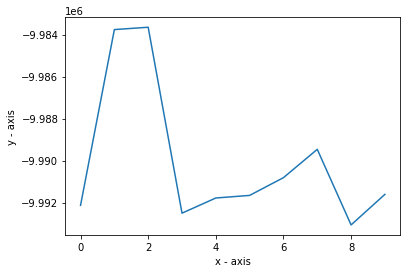

[146.4690551212272, 119.37203076498051, 80.12095939482636, 42.24798172529555, 9.799950897510998]


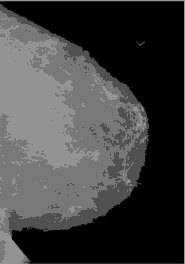

PSNR value for this image is 31.202576117003016
SSIM: 0.8362592096494493


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:233: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [ ]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='5.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5
# print(h)

def dist(a,b):
    t = 0
    p = 0
    for i in range(0,nt):
        k1=a[i]*a[i]
        k2=b[i]*b[i]
        k=k1-k2
        k=abs(k)
        k=sqrt(k)
        t+=k
#     print(t)
    return t
        

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2


def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]
    
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        probab= 0
        radius= 100
        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            for j in range(0,num_particles):
                pos=list(swarm[j].position_i)
                err=float(swarm[j].err_i)
                for k in range(0,num_particles):
                    if dist(list(swarm[j].position_i),list(swarm[k].position_i))<=radius:
                        if swarm[k].err_i<err:
                            err=float(swarm[k].err_i)
                            pos=list(swarm[k].position_i)
                    else:
                        if random.random()<=probab and swarm[k].err_i<err:
                            err=float(swarm[k].err_i)
                            pos=list(swarm[k].position_i)
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
            probab=probab+1.0/maxiter
        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))



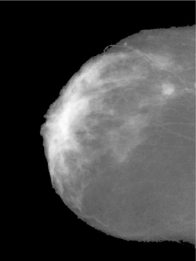

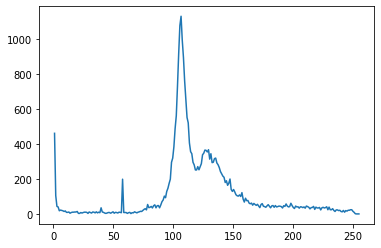

FINAL:
[55.963923215878744, 171.93718201879176, 123.66413604120442, 91.676445196016, 13.962957325957115]
-9567374.511294134
FINAL:
[82.37625553671447, 186.01654287209004, 117.7714968411711, 144.1872566559567, 24.320833753535158]
-9568303.874740422
FINAL:
[1.0, 123.83742553473209, 171.07229818133496, 22.402221106636276, 79.8857501194613]
-9564420.889634851
FINAL:
[75.84073417769946, 174.03167136115437, 113.38178182812862, 136.84380194611563, 15.883590593664321]
-9568065.555591587
FINAL:
[177.57359652013287, 75.7958076375719, 19.282463020006993, 141.4619963143888, 117.60891502902186]
-9568433.93394671
FINAL:
[75.93251317629517, 20.861705410564618, 119.93039547887176, 183.0404613314941, 143.50080312612306]
-9568520.365508229
FINAL:
[255.0, 76.10366764767421, 123.42088148023443, 171.34681915241825, 18.644524505620616]
-9564379.446234688
FINAL:
[185.27163004072708, 76.45029658537958, 143.90922918392704, 23.902239058864932, 119.10120567344583]
-9568493.463979464
FINAL:
[117.72787200103984, 2

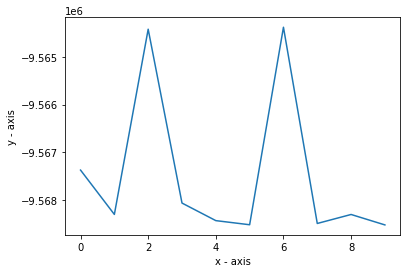

[184.0071010803549, 143.62352146261202, 116.00074500262636, 75.78742136564199, 17.075389138179307]


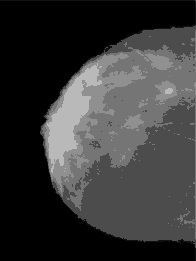

PSNR value for this image is 30.866958658817772
SSIM: 0.8455346942316495


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:233: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [6]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='6.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5
# print(h)

def dist(a,b):
    t = 0
    p = 0
    for i in range(0,nt):
        k1=a[i]*a[i]
        k2=b[i]*b[i]
        k=k1-k2
        k=abs(k)
        k=sqrt(k)
        t+=k
#     print(t)
    return t
        

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2


def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]
    
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        probab= 0
        radius= 100
        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            for j in range(0,num_particles):
                pos=list(swarm[j].position_i)
                err=float(swarm[j].err_i)
                for k in range(0,num_particles):
                    if dist(list(swarm[j].position_i),list(swarm[k].position_i))<=radius:
                        if swarm[k].err_i<err:
                            err=float(swarm[k].err_i)
                            pos=list(swarm[k].position_i)
                    else:
                        if random.random()<=probab and swarm[k].err_i<err:
                            err=float(swarm[k].err_i)
                            pos=list(swarm[k].position_i)
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
            probab=probab+1.0/maxiter
        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))



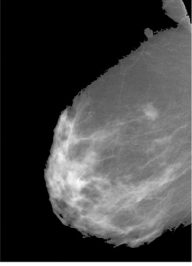

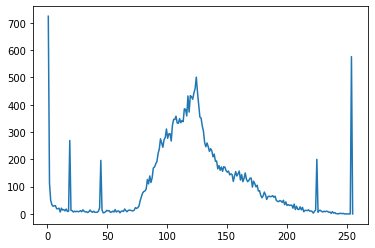

FINAL:
[39.33019334763497, 255.0, 255, 150.63583483335668, 108.05123331898072]
-9452993.155931558
FINAL:
[107.30665828666251, 12.982004361934207, 63.05301879972974, 189.62102135281623, 140.358141423077]
-9465503.585259091
FINAL:
[192.10615847179454, 63.86395991469325, 12.791173429463058, 143.67187751236366, 111.08801253396318]
-9465671.634583026
FINAL:
[43.42779400881843, 188.03247740597058, 140.7490207427028, 1.0, 106.16572888337274]
-9454560.301586464
FINAL:
[112.85153835353343, 64.82574579132618, 151.3807759952675, 12.697719955535774, 255.0]
-9464584.742597952
FINAL:
[12.180546471939515, 110.08776261706063, 65.42361192895557, 189.0359155608144, 142.84404339041808]
-9465694.970688071
FINAL:
[13.15122716416182, 255.0, 65.6742300707658, 153.79386800396458, 114.21714407817363]
-9464548.458636012
FINAL:
[255.0, 12.140488343782692, 151.74833105006763, 65.46984911629768, 113.1589262251837]
-9464617.656087797
FINAL:
[12.756469860102161, 142.66141003295286, 62.50912044647089, 110.78614056898

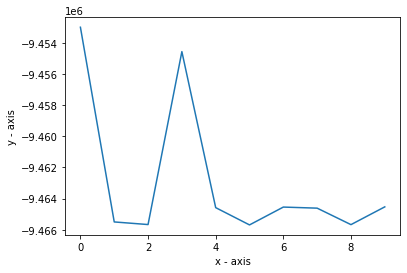

[255.0, 151.30414377394632, 113.78282372060946, 67.99849607874451, 12.559999351386432]


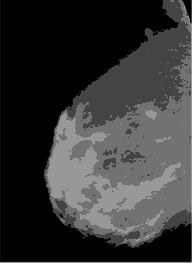

PSNR value for this image is 31.05099872838187
SSIM: 0.8155135790788945


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:233: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [7]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='7.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5
# print(h)

def dist(a,b):
    t = 0
    p = 0
    for i in range(0,nt):
        k1=a[i]*a[i]
        k2=b[i]*b[i]
        k=k1-k2
        k=abs(k)
        k=sqrt(k)
        t+=k
#     print(t)
    return t
        

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2


def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]
    
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        probab= 0
        radius= 100
        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            for j in range(0,num_particles):
                pos=list(swarm[j].position_i)
                err=float(swarm[j].err_i)
                for k in range(0,num_particles):
                    if dist(list(swarm[j].position_i),list(swarm[k].position_i))<=radius:
                        if swarm[k].err_i<err:
                            err=float(swarm[k].err_i)
                            pos=list(swarm[k].position_i)
                    else:
                        if random.random()<=probab and swarm[k].err_i<err:
                            err=float(swarm[k].err_i)
                            pos=list(swarm[k].position_i)
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
            probab=probab+1.0/maxiter
        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))



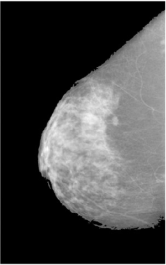

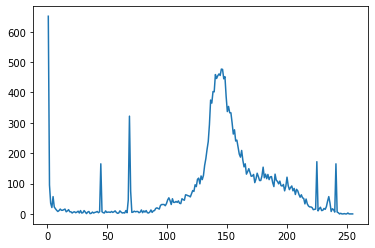

FINAL:
[95.9387364552074, 42.09503233303486, 133.2093751825524, 172.2844705725401, 9.008141635354907]
-8993980.409132339
FINAL:
[15.95011219150281, 147.69447860384923, 66.37313660094613, 113.09249742891714, 180.35631622908173]
-8994359.172310758
FINAL:
[14.16541561522828, 130.6849920705341, 190.79488608895804, 84.97379825090765, 156.84774424798027]
-8994093.20201683
FINAL:
[26.99557699688035, 180.7816664980705, 152.9584009656334, 126.17754025537349, 85.06328039634738]
-8994633.420336869
FINAL:
[100.07864378032794, 135.87737734282405, 25.888924628673266, 171.95373470752364, 255.0]
-8990291.077520486
FINAL:
[188.4530169280562, 19.308309732934315, 159.1152898726909, 128.551493638413, 89.69018773963764]
-8994737.156225614
FINAL:
[172.42409198213326, 132.91357103750042, 1.0, 22.330675066665187, 90.49539673922804]
-8991272.550004754
FINAL:
[23.241421920442335, 1.0, 91.1167616853306, 133.06156926635083, 172.16346137873543]
-8991276.84527674
FINAL:
[155.17316350608647, 125.01454193478584, 183.

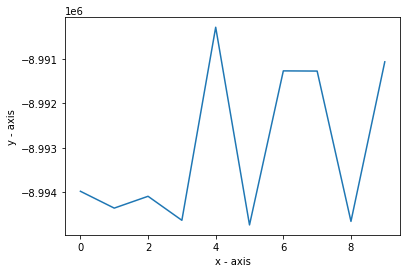

[172.2844705725401, 133.2093751825524, 95.9387364552074, 42.09503233303486, 9.008141635354907]


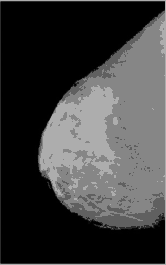

PSNR value for this image is 31.56224615053386
SSIM: 0.8527406431832412


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:233: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


In [8]:
%matplotlib inline
import cv2 
import math
import random
import numpy
import time
import matplotlib.pyplot as plt 
from math import log10, sqrt 
from skimage.measure import compare_ssim
from google.colab.patches import cv2_imshow

image='8.png'
img = cv2.imread(image,0)
h, bin_edges = numpy.histogram(img, bins=256, range=(1, 256))
L=256
rr = []
y = []
imgplot = cv2_imshow(img)
plt.show()
plt.plot( bin_edges[:-1],h) 
plt.show()
nt=5
# print(h)

def dist(a,b):
    t = 0
    p = 0
    for i in range(0,nt):
        k1=a[i]*a[i]
        k2=b[i]*b[i]
        k=k1-k2
        k=abs(k)
        k=sqrt(k)
        t+=k
#     print(t)
    return t
        

def PSNR(original, compressed): 
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal.  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 


def u(a,b):
    t1 = 0
    t2 = 0
    for i in range(a,b):
        t1 = t1 + (i*(h[i-1]+1))
    for i in range(a,b):
        t2 = t2 + h[i-1]+1
#     print(t2)
    return t1/t2

def hh(a,th):
    if a==1 :
        t=0
        for i in range(a,th[0]):
            t=t+(i*h[i-1]*math.log(u(1,th[0])))
        return t
    if a<=nt :
        t=0
        for i in range(th[a-2],th[a-1]):
            t=t+(i*h[i-1]*math.log(u(th[a-2],th[a-1])))
        return t
    if a==nt+1 :
        t=0
        for i in range(th[a-2],L+1):
            t=t+(i*h[i-1]*math.log(u(th[a-2],L+1)))
        return t

def objf(tt):
    t1=0
    t2=0
    tt=numpy.sort(tt)
    th=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,nt):
        th[i]=int(tt[i])
    for i in range(1,L+1):
        t1=t1+(i*h[i-1]*math.log10(i))
    for i in range(1,nt+2):
        t2=t2+hh(i,th)
    return t1-t2


def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

class Particle:
    def __init__(self,x0):
        self.position_i=[]
        self.velocity_i=[]
        self.pos_best_i=[]
        self.err_best_i=-1
        self.err_i=-1

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)
#         print(self.position_i)
#         print(self.err_i)
#         print(self.err_best_i)
#         print("")
        if self.err_i < self.err_best_i or self.err_best_i==-1:
#             print("updated")
#             print(self.err_best_i)
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5
        c1=4
        c2=4

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]
            
            if self.position_i[i]>bounds[1][i]:
                self.position_i[i]=bounds[1][i]
            if self.position_i[i] < bounds[0][i]:
                self.position_i[i]=bounds[0][i]
    
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        probab= 0
        radius= 100
        num_dimensions=len(x0)
        err_best_g=-1
        pos_best_g=[]

        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(objf)

                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            for j in range(0,num_particles):
                pos=list(swarm[j].position_i)
                err=float(swarm[j].err_i)
                for k in range(0,num_particles):
                    if dist(list(swarm[j].position_i),list(swarm[k].position_i))<=radius:
                        if swarm[k].err_i<err:
                            err=float(swarm[k].err_i)
                            pos=list(swarm[k].position_i)
                    else:
                        if random.random()<=probab and swarm[k].err_i<err:
                            err=float(swarm[k].err_i)
                            pos=list(swarm[k].position_i)
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
            probab=probab+1.0/maxiter
        print('FINAL:')
        print(pos_best_g)
        print(err_best_g)
        
        rr.append(pos_best_g)
        y.append(err_best_g)
        

x = []
for i in range(0,10):
    initial=numpy.random.randint(1,255,nt) 
    bounds=[(1,1,1,1,1,1,1,1,1,1),(255,255,255,255,255,255,255,255,255,255)]
    t=PSO(objf,initial,bounds,num_particles=10,maxiter=100)
    x.append(i)
plt.plot(x, y) 
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.show()

t=y[0]
result=rr[0]
for r in range(1,len(y)):
    if y[i]<t:
        t=y[i]
        result=rr[i]
result.sort()
result=result[::-1]
print(result)
h,w = img.shape
#print(img)
for i in range(0,h):
    for j in range(0,w):
        t = 255/nt
        p = 255
        for k in range(0,nt+1):
            if k==0:
                if img[i][j]>result[k] and img[i][j]<=256:
                    img[i][j]=int(result[k]+1)
            elif k<nt:
                if img[i][j]>result[k] and img[i][j]<result[k-1]:
                    img[i][j]=int(result[k]+1)
            else:
                if img[i][j]>0 and img[i][j]<result[k-1]:
                    img[i][j]=1
            p-=t

imgplot = cv2_imshow(img)
plt.show()
oimg = cv2.imread(image,0)
#print(img)
#print(oimg)
value=PSNR(img,oimg)
print('PSNR value for this image is '+str(value))
(score, diff) = compare_ssim(img, oimg, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

